<a href="https://colab.research.google.com/github/musharrafhamraz/deep-learning-uconnect/blob/main/day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [32]:
df=pd.read_csv('./Churn_Modelling.csv')

In [33]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [34]:
df.drop(columns = ['RowNumber','CustomerId','Surname'], inplace= True )

In [35]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [36]:
df.isnull().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [37]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10002 non-null  int64  
 1   Geography        10001 non-null  object 
 2   Gender           10002 non-null  object 
 3   Age              10001 non-null  float64
 4   Tenure           10002 non-null  int64  
 5   Balance          10002 non-null  float64
 6   NumOfProducts    10002 non-null  int64  
 7   HasCrCard        10001 non-null  float64
 8   IsActiveMember   10001 non-null  float64
 9   EstimatedSalary  10002 non-null  float64
 10  Exited           10002 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 859.7+ KB


In [39]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2510
Spain      2477
Name: count, dtype: int64

Text(0.5, 1.0, 'Comparsion betweeen Countries and Customers')

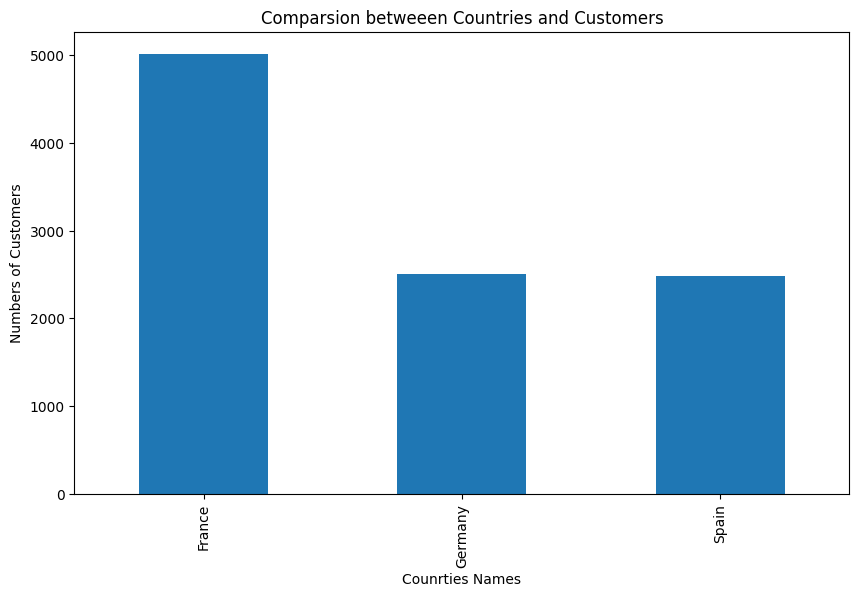

In [40]:
plt.figure(figsize=(10, 6))
df['Geography'].value_counts().plot(kind='bar')
plt.xlabel('Counrties Names')
plt.ylabel('Numbers of Customers')
plt.title("Comparsion betweeen Countries and Customers")

Text(0.5, 1.0, 'Comparsion betweeen Exited and Customers')

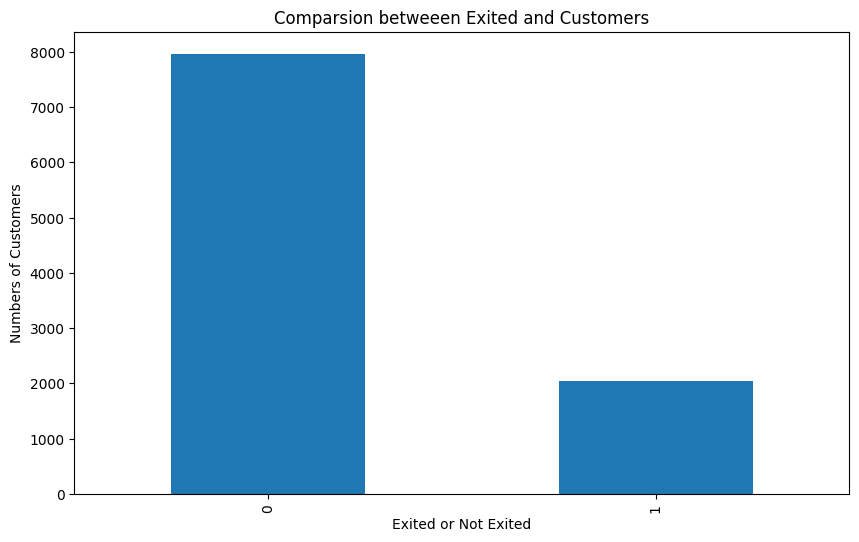

In [41]:
plt.figure(figsize=(10, 6))
df['Exited'].value_counts().plot(kind='bar')
plt.xlabel('Exited or Not Exited')
plt.ylabel('Numbers of Customers')
plt.title("Comparsion betweeen Exited and Customers")

Text(0.5, 1.0, 'Comparsion betweeen Genders')

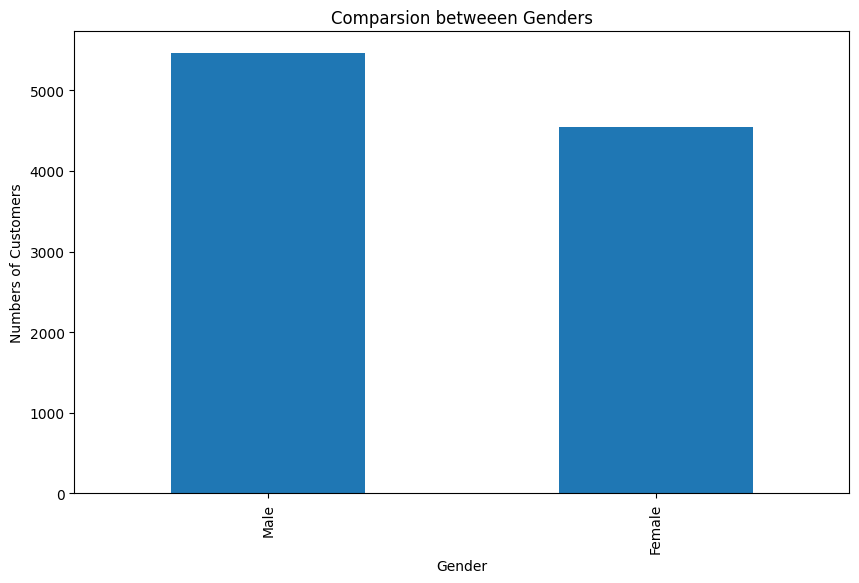

In [42]:
plt.figure(figsize=(10, 6))
df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Numbers of Customers')
plt.title("Comparsion betweeen Genders")

# Encoding the Categorical data

In [43]:
df = pd.get_dummies(df, columns= ['Geography', 'Gender'], drop_first=False)


In [44]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,True,False,False,True,False
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,False,True,True,False
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,True,False,False,True,False
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,True,False,False,True,False
4,850,43.0,2,125510.82,1,NaN,1.0,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,709,36.0,7,0.00,1,0.0,1.0,42085.58,1,True,False,False,True,False
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,False,True,False,False,True
9999,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,False,True,False,False,True
10000,792,28.0,4,130142.79,1,1.0,0.0,38190.78,0,True,False,False,True,False


In [45]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=3)

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [50]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential # used for init our ANN model
from tensorflow.keras.layers import Dense # used for different layer structure

In [51]:
# initializing the ANN model
classifier=Sequential()

In [52]:
classifier.add(Dense(128,activation='relu',input_dim=13))
classifier.add(Dense(64,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))

c:\Users\Sajid Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

rus = RandomOverSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [57]:
history = classifier.fit(X_train_rus,y_train_rus,epochs=50,verbose=1,validation_split=0.25)

Epoch 1/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6642 - loss: 0.6391 - val_accuracy: 0.0000e+00 - val_loss: 1.0736
Epoch 2/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6656 - loss: 0.6375 - val_accuracy: 0.0000e+00 - val_loss: 1.0992
Epoch 3/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6612 - loss: 0.6405 - val_accuracy: 0.0000e+00 - val_loss: 1.0907
Epoch 4/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6702 - loss: 0.6343 - val_accuracy: 0.0000e+00 - val_loss: 1.0859
Epoch 5/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6603 - loss: 0.6410 - val_accuracy: 0.0000e+00 - val_loss: 1.1066
Epoch 6/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6689 - loss: 0.6352 - val_accuracy: 0.0000e+00 - val_loss: 1.0688
Epoch 7/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6782 - loss: 0.6289 - val_accuracy: 0.0000e+00 - val_loss: 1.0644
Epoch 8/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6607 - los

In [58]:
# predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
y_pred


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1994
           1       0.00      0.00      0.00       507

    accuracy                           0.80      2501
   macro avg       0.40      0.50      0.44      2501
weighted avg       0.64      0.80      0.71      2501



c:\Users\Sajid Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sajid Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sajid Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

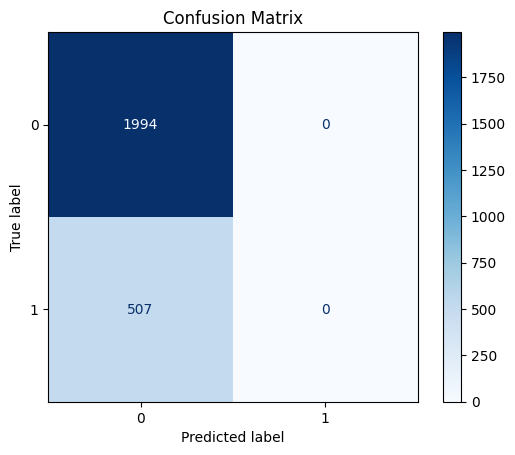

In [59]:
# Confusion Metric
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

confusion_metric = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_metric)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.797281087564974

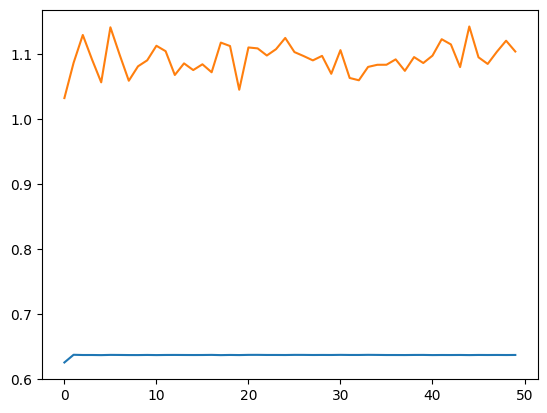

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

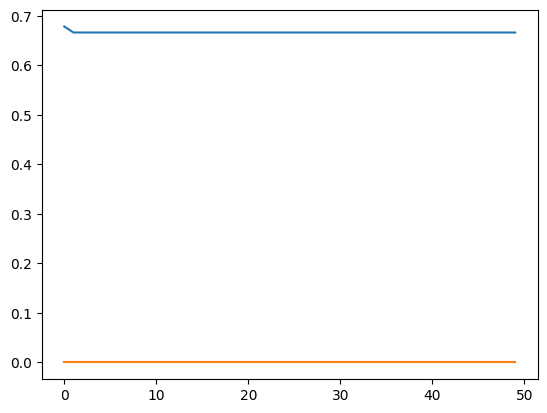

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])